<a href="https://colab.research.google.com/github/FathimaNourinDS/Daibeticsclassification/blob/main/NLP_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
df=pd.read_csv('/content/twitter_validation.csv',header=None,encoding='ISO-8859-1')
df.columns=['id','media','target','text']
df

,id,media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.head()

,id,media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df.tail()

,id,media,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [ ]:
df.isna().sum()

,0
id,0
media,0
target,0
text,0


In [ ]:
df['media'].value_counts()


,count
media,
RedDeadRedemption(RDR),40
johnson&johnson,39
PlayerUnknownsBattlegrounds(PUBG),38
FIFA,38
LeagueOfLegends,37
ApexLegends,36
Nvidia,35
TomClancysRainbowSix,35
GrandTheftAuto(GTA),35


In [ ]:
df['target'].value_counts()

,count
target,
Neutral,285
Positive,277
Negative,266
Irrelevant,172


<Axes: xlabel='target', ylabel='count'>

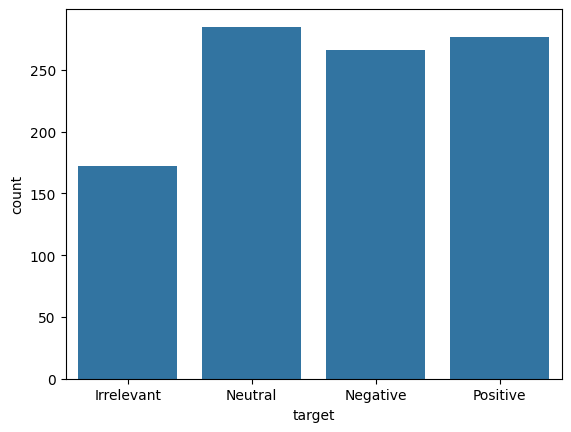

In [ ]:
sns.countplot(x='target',data=df)

In [ ]:
df.drop(['id','media'],axis=1,inplace=True)
df

,target,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so itâs time to drink wine n pl...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df=df[df['target']!='Irrelevant'] # removing irrelevant from the column
df=df.reset_index(drop=True) #to correct the index
# df.drop(df.index[df['target']=='Irrelevant'],axis=0,inplace=True)
df['target'].value_counts()

,count
target,
Neutral,285
Positive,277
Negative,266


In [ ]:
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# ways to convert target into 0,-1,1

# df['target']=df['target'].str.replace('Negative','-1')
# df['target']=df['target'].str.replace('Positive','0')
# df
# df['target']=df['target'].replace({
#     'Negative':-1,
#     'Positive':1,
#     'Neutral':0
# })
# df['target']=df['target'].astype(int)
df['target']=df['target'].map({'Positive':1,'Negative':-1,'Neutral':0})
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.dtypes

,0
target,int64
text,object


In [ ]:
tweet=df.text
tweet

,text
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,"CSGO matchmaking is so full of closet hacking,..."
3,Now the President is slapping Americans in the...
4,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...
823,Please explain how this is possible! How can t...
824,Good on Sony. As much as I want to see the new...
825,Today sucked so itâs time to drink wine n pl...
826,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.isna().sum()

,0
target,0
text,0


In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweet=tweet.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
tweet


,text
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,CSGO matchmaking is so full of closet hacking ...
3,Now the President is slapping Americans in the...
4,Hi @EAHelp Iâ   ve had Madeleine McCann in m...
...,...
823,Please explain how this is possible ! How can ...
824,Good on Sony . As much as I want to see the ne...
825,Today sucked so itâ   s time to drink wine n...
826,Bought a fraction of Microsoft today . Small w...


In [ ]:
# removing special characters
tweet=tweet.str.replace('[^a-zA-Z0-9]',' ',regex=True)
tweet

,text
0,BBC News Amazon boss Jeff Bezos rejects clai...
1,Microsoft Why do I pay for WORD when it funct...
2,CSGO matchmaking is so full of closet hacking ...
3,Now the President is slapping Americans in the...
4,Hi EAHelp I ve had Madeleine McCann in m...
...,...
823,Please explain how this is possible How can ...
824,Good on Sony As much as I want to see the ne...
825,Today sucked so it s time to drink wine n...
826,Bought a fraction of Microsoft today Small w...


In [ ]:
# collect words length  above 3 has a meaningfull word as more than 3 words

In [ ]:
from nltk.tokenize import TweetTokenizer
tweet=tweet.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w)>=3]))
tweet

,text
0,BBC News Amazon boss Jeff Bezos rejects claims...
1,Microsoft Why pay for WORD when functions poor...
2,CSGO matchmaking full closet hacking truly awf...
3,Now the President slapping Americans the face ...
4,EAHelp had Madeleine McCann cellar for the pas...
...,...
823,Please explain how this possible How can they ...
824,Good Sony much want see the new PS5 what going...
825,Today sucked time drink wine play borderlands ...
826,Bought fraction Microsoft today Small wins


In [ ]:
from nltk.stem import SnowballStemmer
stemer=SnowballStemmer('english')
tweet=tweet.apply(lambda x:[stemer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweet

,text
0,bbc news amazon boss jeff bezo reject claim co...
1,microsoft whi pay for word when function poor ...
2,csgo matchmak full closet hack truli aw game
3,now the presid slap american the face that rea...
4,eahelp had madelein mccann cellar for the past...
...,...
823,pleas explain how this possibl how can they le...
824,good soni much want see the new ps5 what go ri...
825,today suck time drink wine play borderland unt...
826,bought fraction microsoft today small win


In [ ]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweet=tweet.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweet

,text
0,bbc news amazon boss jeff bezo reject claim co...
1,microsoft whi pay word function poor samsungus...
2,csgo matchmak full closet hack truli aw game
3,presid slap american face realli commit unlaw ...
4,eahelp madelein mccann cellar past year littl ...
...,...
823,pleas explain possibl let compani overcharg sc...
824,good soni much want see new ps5 go right much ...
825,today suck time drink wine play borderland sun...
826,bought fraction microsoft today small win


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweet)
data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10461 stored elements and shape (828, 3763)>

In [ ]:
print(data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10461 stored elements and shape (828, 3763)>
  Coords	Values
  (0, 515)	0.49155204783978756
  (0, 2267)	0.38864111655856126
  (0, 353)	0.1515362387424402
  (0, 610)	0.22681557001542715
  (0, 1813)	0.24577602391989378
  (0, 545)	0.2608257828483461
  (0, 2741)	0.2608257828483461
  (0, 785)	0.21432663830218204
  (0, 838)	0.17354914655342313
  (0, 286)	0.22681557001542715
  (0, 1976)	0.13277165480466424
  (0, 1108)	0.23509805002803952
  (0, 982)	0.2608257828483461
  (0, 668)	0.2608257828483461
  (1, 2135)	0.24555654927912696
  (1, 3619)	0.26216072802580975
  (1, 2442)	0.3126902562590763
  (1, 3659)	0.36557591217188057
  (1, 1383)	0.4055823664694651
  (1, 2538)	0.3821800909185634
  (1, 2871)	0.4055823664694651
  (1, 775)	0.4055823664694651
  (2, 934)	0.3041178383627944
  (2, 2085)	0.3963165794888645
  (2, 1380)	0.3790982275064499
  :	:
  (825, 3363)	0.2560582225152133
  (825, 3373)	0.3395996844494918
  (825, 826)	0.25069214907989

In [ ]:
data.shape #input data

(828, 3763)

In [ ]:
y=df['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
knn=KNeighborsClassifier(n_neighbors=5)
nav=BernoulliNB()
sv=SVC()


In [ ]:
lst=[knn,nav,sv]
for i in lst:
  print('model',i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  y_pred
  print("accuracy_score",accuracy_score(y_test,y_pred))
  # print("confusion",confusion_matrix(y_test,y_pred))
  # print("classification",classification_report(y_pred,y_test))

model KNeighborsClassifier()
accuracy_score 0.4899598393574297
model BernoulliNB()
accuracy_score 0.5461847389558233
model SVC()
accuracy_score 0.6265060240963856
